## Analíse de dados da NBA
Previsão do MVP

In [1]:
#Importando as bibliotecas
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Temporada e Modo poderiam ser por jogo ou no total, neste caso usarei o total
temporada = '2023-24'
modo = 'Totals'

In [3]:
#WebScrapping do site: https://www.nba.com/stats/
#Jogadores_url: informações por jogo do jogador
#Equipes_url trará informaçoes total até o momento da temporada da equipe
#idades_url trará informações total até o momento da temporada do jogador
jogadores_url = 'https://stats.nba.com/stats/leaguegamelog?Counter=1000&DateFrom=&DateTo=&Direction=DESC&LeagueID=00&PlayerOrTeam=P&Season='+temporada+'&SeasonType=Regular+Season&Sorter=DATE'.format(temporada)
equipes_url = 'https://stats.nba.com/stats/leaguedashteamstats?Conference=&DateFrom=&DateTo=&Division=&GameScope=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode='+modo+'&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season='+temporada+'&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision='.format(modo, temporada)
xxxxxxxxxx = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&ISTRound=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode='+modo+'&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2022-23&SeasonSegment=&SeasonType=Regular%20Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

In [4]:
#Cabeçalho (Não consegui encontrar uma forma mais simples, então procurei na internet e achei esse comando no https://jman4190.medium.com/building-an-nba-mysql-database-with-python-c653fa15333c)
headers  = {'Connection': 'keep-alive', 'Accept': 'application/json, text/plain, */*',
'x-nba-stats-token': 'true', 
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
'x-nba-stats-origin': 'stats', 'Sec-Fetch-Site': 'same-origin', 'Sec-Fetch-Mode': 'cors', 
'Referer': 'https://stats.nba.com/', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'en-US,en;q=0.9'}

In [5]:
#Esta é a resposta que recebemos. Vamos salvá-lo em uma variável de resposta para que possamos acessar os dados específicos.
informacoes_jogadores = requests.get(url=jogadores_url, headers=headers).json()
informacoes_equipes = requests.get(url=equipes_url, headers=headers).json()

In [6]:
#Obtendo o conjunto de resultados, pega o primeiro conjunto de dados e o conjunto de linhas específico.
info_jogadores = informacoes_jogadores['resultSets'][0]['rowSet']
info_equipes = informacoes_equipes['resultSets'][0]['rowSet']

In [7]:
#Colunas que o site disponibiliza (Inspecionar/Network/LeaguaDashStats)
colunas_jogadores = [ "SEASON_ID","PLAYER_ID","PLAYER_NAME","TEAM_ID","TEAM_ABBREVIATION","TEAM_NAME","GAME_ID","GAME_DATE",
"MATCHUP","WL","MIN","FGM","FGA","FG_PCT","FG3M","FG3A","FG3_PCT","FTM","FTA","FT_PCT","OREB","DREB","REB","AST","STL","BLK",
"TOV","PF","PTS","PLUS_MINUS","FANTASY_PTS","VIDEO_AVALIABLE"]

In [8]:
colunas_equipes = ["TEAM_ID","TEAM_NAME","GP","W","L","W_PCT","MIN","FGM","FGA","FG_PCT","FG3M","FG3A","FG3_PCT","FTM","FTA",
"FT_PCT","OREB","DREB","REB","AST","TOV","STL","BLK","BLKA","PF","PFD","PTS","PLUS_MINUS","GP_RANK","W_RANK","L_RANK","W_PCT_RANK",
"MIN_RANK","FGM_RANK","FGA_RANK","FG_PCT_RANK","FG3M_RANK","FG3A_RANK","FG3_PCT_RANK","FTM_RANK","FTA_RANK","FT_PCT_RANK",
"OREB_RANK","DREB_RANK","REB_RANK","AST_RANK","TOV_RANK","STL_RANK","BLK_RANK","BLKA_RANK","PF_RANK","PFD_RANK","PTS_RANK",
"PLUS_MINUS_RANK"]

In [9]:
#Criando o dataframe que vamos utilizar para fazer a analise
cols_jogadores = pd.DataFrame(info_jogadores, columns = colunas_jogadores)
cols_equipes = pd.DataFrame(info_equipes, columns = colunas_equipes)

In [10]:
#Apagando colunas 'desnecessárias' (no dataframe da equipe só utilizarei no primeiro momento as colunas GP = Jogos realizados e Team Name e Team ID)
#df_equipes = cols_equipes.drop(["W","L","W_PCT","MIN","FGM","FGA","FG_PCT","FG3M","FG3A","FG3_PCT","FTM","FTA","FT_PCT","OREB",
#"DREB","REB","AST","TOV","STL","BLK","BLKA","PF","PFD","PTS","PLUS_MINUS","GP_RANK","W_RANK","L_RANK","W_PCT_RANK","MIN_RANK",
#"FGM_RANK","FGA_RANK","FG_PCT_RANK","FG3M_RANK","FG3A_RANK","FG3_PCT_RANK","FTM_RANK","FTA_RANK","FT_PCT_RANK","OREB_RANK","DREB_RANK",
#"REB_RANK","AST_RANK","TOV_RANK","STL_RANK","BLK_RANK","BLKA_RANK","PF_RANK","PFD_RANK","PTS_RANK","PLUS_MINUS_RANK","CFID",
#"CFPARAMS"], axis = 1)


In [11]:
df_jogadores = cols_jogadores
df_equipes = cols_equipes

In [12]:
#Novo conjunto de dados gerado (Só terão os dados de identificação da equipe e a somatoria dos jogos reaizados até o momento)
df_equipes.head(5)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,1610612737,Atlanta Hawks,82,36,46,0.439,3971.0,3529,7584,0.465,...,6,16,16,16,26,22,15,7,5,21
1,1610612738,Boston Celtics,82,64,18,0.780,3966.0,3601,7396,0.487,...,2,14,1,27,1,1,2,30,2,1
2,1610612751,Brooklyn Nets,82,32,50,0.390,3961.0,3334,7307,0.456,...,11,20,12,28,12,16,13,21,25,22
3,1610612766,Charlotte Hornets,82,21,61,0.256,3946.0,3281,7133,0.460,...,30,26,18,25,25,13,7,29,28,30
4,1610612741,Chicago Bulls,82,39,43,0.476,3996.0,3448,7339,0.470,...,14,23,3,9,18,14,17,14,22,20


In [13]:
df_equipes.shape

(30, 54)

In [14]:
#Apagando colunas 'desnecessárias'
#df_jogadores = cols_jogadores.drop(["SEASON_ID","GAME_DATE","FANTASY_PTS","VIDEO_AVALIABLE"], axis = 1)

In [15]:
df_jogadores.head(5)

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVALIABLE
0,22023,1631115,Orlando Robinson,1610612748,MIA,Miami Heat,0022301189,2024-04-14,MIA vs. TOR,W,...,0,0,0,0,0,0,0,-8,0.0,1
1,22023,1631128,Christian Braun,1610612743,DEN,Denver Nuggets,0022301193,2024-04-14,DEN @ MEM,W,...,10,5,2,0,1,2,19,-7,43.5,1
2,22023,1631222,Jake LaRavia,1610612763,MEM,Memphis Grizzlies,0022301193,2024-04-14,MEM vs. DEN,L,...,5,4,0,0,4,3,29,-19,37.0,1
3,22023,1641851,Timmy Allen,1610612763,MEM,Memphis Grizzlies,0022301193,2024-04-14,MEM vs. DEN,L,...,1,1,2,0,0,3,1,-6,9.7,1
4,22023,1631212,Peyton Watson,1610612743,DEN,Denver Nuggets,0022301193,2024-04-14,DEN @ MEM,W,...,2,1,1,0,1,3,11,-7,16.9,1


In [16]:
df_jogadores.shape

(26401, 32)

In [17]:
df_equipes.to_csv('Equipes 23-24.csv')
df_jogadores.to_csv('Jogadores 23-24.csv')

In [18]:
#Fazendo uma cópia do dataframe df_jogadores (mmpptime - MAIORES MEDIAS PONTUADORES POR TIME)
mmpptime = df_jogadores.copy()

In [19]:
mmpptime.head(5)

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVALIABLE
0,22023,1631115,Orlando Robinson,1610612748,MIA,Miami Heat,0022301189,2024-04-14,MIA vs. TOR,W,...,0,0,0,0,0,0,0,-8,0.0,1
1,22023,1631128,Christian Braun,1610612743,DEN,Denver Nuggets,0022301193,2024-04-14,DEN @ MEM,W,...,10,5,2,0,1,2,19,-7,43.5,1
2,22023,1631222,Jake LaRavia,1610612763,MEM,Memphis Grizzlies,0022301193,2024-04-14,MEM vs. DEN,L,...,5,4,0,0,4,3,29,-19,37.0,1
3,22023,1641851,Timmy Allen,1610612763,MEM,Memphis Grizzlies,0022301193,2024-04-14,MEM vs. DEN,L,...,1,1,2,0,0,3,1,-6,9.7,1
4,22023,1631212,Peyton Watson,1610612743,DEN,Denver Nuggets,0022301193,2024-04-14,DEN @ MEM,W,...,2,1,1,0,1,3,11,-7,16.9,1


In [20]:
# Criando um novo dataframe que une dois dataframes (jogadores e equipes), baseados pela coluna "TEAM_ID"
mmpptime = pd.merge(mmpptime, df_equipes, how = "left", on = "TEAM_ID",) 

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
mmpptime.head(5)

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME_x,GAME_ID,GAME_DATE,MATCHUP,WL,MIN_x,FGM_x,FGA_x,FG_PCT_x,FG3M_x,FG3A_x,FG3_PCT_x,FTM_x,FTA_x,FT_PCT_x,OREB_x,DREB_x,REB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,PTS_x,PLUS_MINUS_x,FANTASY_PTS,VIDEO_AVALIABLE,TEAM_NAME_y,GP,W,L,W_PCT,MIN_y,FGM_y,FGA_y,FG_PCT_y,FG3M_y,FG3A_y,FG3_PCT_y,FTM_y,FTA_y,FT_PCT_y,OREB_y,DREB_y,REB_y,AST_y,TOV_y,STL_y,BLK_y,BLKA,PF_y,PFD,PTS_y,PLUS_MINUS_y,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,22023,1631115,Orlando Robinson,1610612748,MIA,Miami Heat,0022301189,2024-04-14,MIA vs. TOR,W,2,0,0,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,-8,0.0,1,Miami Heat,82,46,36,0.561,3951.0,3266,7022,0.465,1022,2765,0.370,1478,1806,0.818,766,2702,3468,2116,1038.0,617,280,388,1415,1550,9032,144.0,1,16,16,16,21,28,28,22,19,18,12,10,13,5,26,16,26,18,6,15,30,10,4,11,26,16
1,22023,1631128,Christian Braun,1610612743,DEN,Denver Nuggets,0022301193,2024-04-14,DEN @ MEM,W,25,6,14,0.429,2,6,0.333,5,6,0.833,5,5,10,5,2,0,1,2,19,-7,43.5,1,Denver Nuggets,82,57,25,0.695,3941.0,3610,7279,0.496,958,2560,0.374,1240,1628,0.762,881,2762,3643,2415,1036.0,585,456,394,1489,1467,9418,431.0,1,2,2,2,26,3,17,4,25,30,10,29,29,25,13,9,7,3,5,21,10,12,9,26,14,4
2,22023,1631222,Jake LaRavia,1610612763,MEM,Memphis Grizzlies,0022301193,2024-04-14,MEM vs. DEN,L,40,11,20,0.550,4,11,0.364,3,4,0.750,2,3,5,4,0,0,4,3,29,-19,37.0,1,Memphis Grizzlies,82,27,55,0.329,3956.0,3145,7229,0.435,1071,3097,0.346,1316,1722,0.764,896,2598,3494,2025,1236.0,673,501,535,1563,1539,8677,-574.0,1,24,24,24,17,30,21,30,12,6,29,22,19,23,10,27,24,27,26,4,4,30,20,13,30,26
3,22023,1641851,Timmy Allen,1610612763,MEM,Memphis Grizzlies,0022301193,2024-04-14,MEM vs. DEN,L,24,0,2,0.000,0,0,NaN,1,2,0.500,0,1,1,1,2,0,0,3,1,-6,9.7,1,Memphis Grizzlies,82,27,55,0.329,3956.0,3145,7229,0.435,1071,3097,0.346,1316,1722,0.764,896,2598,3494,2025,1236.0,673,501,535,1563,1539,8677,-574.0,1,24,24,24,17,30,21,30,12,6,29,22,19,23,10,27,24,27,26,4,4,30,20,13,30,26
4,22023,1631212,Peyton Watson,1610612743,DEN,Denver Nuggets,0022301193,2024-04-14,DEN @ MEM,W,21,5,7,0.714,1,1,1.000,0,0,NaN,1,1,2,1,1,0,1,3,11,-7,16.9,1,Denver Nuggets,82,57,25,0.695,3941.0,3610,7279,0.496,958,2560,0.374,1240,1628,0.762,881,2762,3643,2415,1036.0,585,456,394,1489,1467,9418,431.0,1,2,2,2,26,3,17,4,25,30,10,29,29,25,13,9,7,3,5,21,10,12,9,26,14,4


In [23]:
#Listando 30 jogadores com as maiores medias de pontuação (1 por equipes) e que jogou pelo menos metade dos jogos das equipes
##Criando uma nova coluna que conta o numero de jogos que cada jogador participou (PLAYER_GP)
mmpptime["PLAYER_GP"] = mmpptime.groupby(["PLAYER_ID"])["PLAYER_ID"].transform("count")

In [24]:
#Criando uma nova coluna que conta o percentual de "Jogos Jogados" = (PLAYER_GP_PCT)
mmpptime["PLAYER_GP_PCT"] = (mmpptime["PLAYER_GP"]/mmpptime["GP"])

In [25]:
#Filtrando os jogadores que jogaram pelo menos 75% das partidas da equipe na temporada
##Definindo a variavel para o valor de corte 
valor_corte = .75
mmpptime = mmpptime[mmpptime["PLAYER_GP_PCT"] > valor_corte]

In [26]:
display(mmpptime)

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME_x,GAME_ID,GAME_DATE,MATCHUP,WL,MIN_x,FGM_x,FGA_x,FG_PCT_x,FG3M_x,FG3A_x,FG3_PCT_x,FTM_x,FTA_x,FT_PCT_x,OREB_x,DREB_x,REB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,PTS_x,PLUS_MINUS_x,FANTASY_PTS,VIDEO_AVALIABLE,TEAM_NAME_y,GP,W,L,W_PCT,MIN_y,FGM_y,FGA_y,FG_PCT_y,FG3M_y,FG3A_y,FG3_PCT_y,FTM_y,FTA_y,FT_PCT_y,OREB_y,DREB_y,REB_y,AST_y,TOV_y,STL_y,BLK_y,BLKA,PF_y,PFD,PTS_y,PLUS_MINUS_y,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,PLAYER_GP,PLAYER_GP_PCT
1,22023,1631128,Christian Braun,1610612743,DEN,Denver Nuggets,0022301193,2024-04-14,DEN @ MEM,W,25,6,14,0.429,2,6,0.333,5,6,0.833,5,5,10,5,2,0,1,2,19,-7,43.5,1,Denver Nuggets,82,57,25,0.695,3941.0,3610,7279,0.496,958,2560,0.374,1240,1628,0.762,881,2762,3643,2415,1036.0,585,456,394,1489,1467,9418,431.0,1,2,2,2,26,3,17,4,25,30,10,29,29,25,13,9,7,3,5,21,10,12,9,26,14,4,82,1.000000
4,22023,1631212,Peyton Watson,1610612743,DEN,Denver Nuggets,0022301193,2024-04-14,DEN @ MEM,W,21,5,7,0.714,1,1,1.000,0,0,NaN,1,1,2,1,1,0,1,3,11,-7,16.9,1,Denver Nuggets,82,57,25,0.695,3941.0,3610,7279,0.496,958,2560,0.374,1240,1628,0.762,881,2762,3643,2415,1036.0,585,456,394,1489,1467,9418,431.0,1,2,2,2,26,3,17,4,25,30,10,29,29,25,13,9,7,3,5,21,10,12,9,26,14,4,80,0.975610
8,22023,1628380,Zach Collins,1610612759,SAS,San Antonio Spurs,0022301197,2024-04-14,SAS vs. DET,W,16,6,11,0.545,1,2,0.500,4,4,1.000,4,5,9,2,1,0,0,3,17,18,33.8,1,San Antonio Spurs,82,22,60,0.268,3966.0,3438,7436,0.462,1036,2983,0.347,1280,1637,0.782,849,2778,3627,2449,1242.0,584,520,380,1414,1470,9192,-532.0,1,26,26,26,7,18,7,25,16,11,28,25,28,14,18,8,8,2,27,22,3,8,3,25,23,25,69,0.841463
12,22023,1630200,Tre Jones,1610612759,SAS,San Antonio Spurs,0022301197,2024-04-14,SAS vs. DET,W,25,5,12,0.417,1,6,0.167,0,0,NaN,0,6,6,6,1,0,0,1,11,16,30.2,1,San Antonio Spurs,82,22,60,0.268,3966.0,3438,7436,0.462,1036,2983,0.347,1280,1637,0.782,849,2778,3627,2449,1242.0,584,520,380,1414,1470,9192,-532.0,1,26,26,26,7,18,7,25,16,11,28,25,28,14,18,8,8,2,27,22,3,8,3,25,23,25,77,0.939024
16,22023,1630201,Malachi Flynn,1610612765,DET,Detroit Pistons,0022301197,2024-04-14,DET @ SAS,L,20,2,8,0.250,0,4,0.000,0,0,NaN,0,1,1,3,1,0,1,0,4,-17,11.7,1,Detroit Pistons,82,14,68,0.171,3951.0,3353,7236,0.463,906,2602,0.348,1398,1780,0.785,861,2692,3553,2088,1248.0,531,384,490,1688,1457,9010,-747.0,1,30,30,30,21,24,20,24,29,27,26,14,15,12,15,18,16,22,28,30,20,25,28,28,27,28,69,0.841463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,22023,1630541,Moses Moody,1610612744,GSW,Golden State Warriors,0022300062,2023-10-24,GSW vs. PHX,L,18,4,6,0.667,2,4,0.500,1,2,0.500,1,2,3,0,3,1,1,1,11,-6,25.6,1,Golden State Warriors,82,46,36,0.561,3966.0,3582,7515,0.477,1211,3191,0.380,1282,1644,0.780,996,2834,3830,2402,1174.0,572,377,407,1598,1471,9657,214.0,1,16,16,16,7,5,3,13,2,4,7,24,27,17,5,4,1,4,23,23,23,15,22,24,8,12,66,0.804878
26397,22023,1630228,Jonathan Kuminga,1610612744,GSW,Golden State Warriors,0022300062,2023-10-24,GSW vs. PHX,L,20,4,8,0.500,0,0,NaN,4,6,0.667,3,3,6,1,2,1,2,5,12,4,27.7,1,Golden State Warriors,82,46,36,0.561,3966.0,3582,7515,0.477,1211,3191,0.380,1282,1644,0.780,996,2834,3830,2402,1174.0,572,377,407,1598,1471,9657,214.0,1,16,16,16,7,5,3,13,2,4,7,24,27,17,5,4,1,4,23,23,23,15,22,24,8,12,74,0.902439
26398,22023,1629234,Drew Eubanks,1610612756,PHX,Phoenix Suns,0022300062,2023-10-24,PHX @ GSW,W,19,1,3,0.333,0,0,NaN,2,4,0.500,2,5,7,2,0,3,3,3,4,-2,21.4,1,Phoenix Suns,82,49,33,0.598,3956.0,3482,7063,0.493,1020,2671

In [27]:
#Calculando a média de pontos por partida de cada jogador
##Criando a coluna AVG_PPG - Media de pontos por jogo
###Deixando a casa decimal do calculo em uma casa decimal 
mmpptime["AVG_PPG"] = mmpptime.groupby(["PLAYER_ID"])["PTS_y"].transform("mean")
mmpptime["AVG_PPG"] = mmpptime["AVG_PPG"].round(1)

In [28]:
#Removendo duplicatas dos jogadores para deixar somente uma linha
mmpptime = mmpptime.drop_duplicates(subset = ["PLAYER_ID"])

In [29]:
#Rankeando os jogadores pela média por cada equipe
mmpptime["TEAM_AVG_PPG_RANK"] = mmpptime.groupby(["TEAM_ID"])["AVG_PPG"].rank(ascending = False)

In [30]:
#Filtrando a coluna para deixar somente a maior média de cada equipe
mmpptime = mmpptime[mmpptime["TEAM_AVG_PPG_RANK"] == 1]

In [31]:
#Ordenando pela média
mmpptime = mmpptime.sort_values(by = ["AVG_PPG"], ascending = False)

In [32]:
#Colunas do df final das medias
mmpptime_colunas = ["PLAYER_NAME", "TEAM_ABBREVIATION", "AVG_PPG"]
mmpptime = mmpptime[mmpptime_colunas]

In [33]:
mmpptime

,PLAYER_NAME,TEAM_ABBREVIATION,AVG_PPG
92,Buddy Hield,PHI,9838.4
288,Bruce Brown,TOR,9654.8
4822,Simone Fontecchio,DET,9369.1
835,Grant Williams,CHA,9311.4
845,Dennis Schroder,BKN,9153.9
2077,Jaren Jackson Jr.,MEM,8677.0


In [34]:
#Formatando casas decimais e precisão dos valores
pd.set_option('display.precision', 0)
pd.set_option('float_format','{:.2f}'.format)

In [35]:
#Equipe que menos pontuou
cols_equipes[['TEAM_NAME','PTS']][cols_equipes.PTS == cols_equipes.PTS.min()]

,TEAM_NAME,PTS
14,Memphis Grizzlies,8677


In [36]:
#Equipes que mais pontuaram
cols_equipes.nlargest(5, 'PTS')[['TEAM_NAME','PTS','W','L','W_PCT']]

,TEAM_NAME,PTS,W,L,W_PCT
11,Indiana Pacers,10110,47,35,0.57
1,Boston Celtics,9887,64,18,0.78
20,Oklahoma City Thunder,9847,57,25,0.69
16,Milwaukee Bucks,9756,49,33,0.60
0,Atlanta Hawks,9703,36,46,0.44


In [37]:
#Maiores pontuadores em um unico jogo
df_jogadores.nlargest(10, 'PTS')[['PLAYER_NAME','TEAM_NAME','PTS',"MATCHUP","WL"]]

,PLAYER_NAME,TEAM_NAME,PTS,MATCHUP,WL
12014,Luka Doncic,Dallas Mavericks,73,DAL @ ATL,W
12598,Joel Embiid,Philadelphia 76ers,70,PHI vs. SAS,W
19058,Giannis Antetokounmpo,Milwaukee Bucks,64,MIL vs. IND,W
12030,Devin Booker,Phoenix Suns,62,PHX @ IND,L
12707,Karl-Anthony Towns,Minnesota Timberwolves,62,MIN vs. CHA,L
2796,Jalen Brunson,New York Knicks,61,NYK @ SAS,L
10766,Stephen Curry,Golden State Warriors,60,GSW @ ATL,L
23833,Giannis Antetokounmpo,Milwaukee Bucks,54,MIL @ IND,L
1497,Tyrese Maxey,Philadelphia 76ers,52,PHI @ SAS,W
2406,Devin Booker,Phoenix Suns,52,PHX @ NOP,W


In [38]:
#Maiores pontuadores de 3 pontos em um unico jogo
df_jogadores.nlargest(10, 'FG3M')[['PLAYER_NAME','TEAM_NAME','FG3M','PTS',"MATCHUP","WL"]]

,PLAYER_NAME,TEAM_NAME,FG3M,PTS,MATCHUP,WL
18553,Keegan Murray,Sacramento Kings,12,47,SAC vs. UTA,W
3525,Donte DiVincenzo,New York Knicks,11,40,NYK vs. DET,W
10055,Stephen Curry,Golden State Warriors,11,42,GSW @ IND,W
3892,Fred VanVleet,Houston Rockets,10,34,HOU vs. UTA,W
4739,Sam Hauser,Boston Celtics,10,30,BOS @ WAS,W
6756,Trey Murphy III,New Orleans Pelicans,10,34,NOP @ TOR,W
10766,Stephen Curry,Golden State Warriors,10,60,GSW @ ATL,L
12707,Karl-Anthony Towns,Minnesota Timberwolves,10,62,MIN vs. CHA,L
19239,Bogdan Bogdanovic,Atlanta Hawks,10,40,ATL vs. DEN,L
661,Fred VanVleet,Houston Rockets,9,42,HOU @ UTA,L


In [39]:
"""
Algoritmo utilizado para prever o MVP da temporada regular

%Pontos da equipe + %Assistencias + %Rebotes + %Roubadas + %3Pontos + %Bloqueios + bonus por resultado (+.25 vitoria ou -.25 derrota) 
"""

#Criando copia do df das estatisticas por jogo de cada jogador
df_mvp = df_jogadores.copy()

In [40]:
#Colunas que serão utilizadas no algoritmo
mvp_colunas = ["PTS","AST","REB","STL","FG3M","BLK"]

In [41]:
for coluna in mvp_colunas:
    #Calculo do total de pontos, assistências e rebotes da equipe em cada jogo
    df_mvp["TEAM_" + coluna] = df_mvp.groupby(["TEAM_ID", "GAME_ID"])[coluna].transform("sum")

    #Calculo da parcela de pontos, assistências e rebotes pelos quais cada jogador é responsável
    df_mvp["SHARE_TEAM_" + coluna] = (df_mvp[coluna] / df_mvp["TEAM_" + coluna])
    
    #Calculo da parcela média de pontos, assistências e rebotes de cada jogador na temporada
    df_mvp["SEASON_AVG_SHARE_" + coluna] = df_mvp.groupby(["PLAYER_ID"])["SHARE_TEAM_" + coluna].transform("mean").round(2)

    #Calculo da participação total de cada jogador em pontos, assistências e rebotes na temporada
    df_mvp["SEASON_TOTAL_SHARE_" + coluna] = df_mvp.groupby(["PLAYER_ID"])["SHARE_TEAM_" + coluna].transform("sum").round(1)

    #Calculo da média de pontos, assistências e rebotes de cada jogador na temporada
    df_mvp["SEASON_AVG_" + coluna] = df_mvp.groupby(["PLAYER_ID"])[coluna].transform("mean").round(1)
    

In [42]:
#Calculo do bonus para vitoria ou derrota
bonus = .25

def calculo_bonus(resultado, bonus):
    if resultado == "W":
        return bonus
    elif resultado == "L":
        return -bonus

In [43]:
#Calculando o bonus para cada linha
df_mvp["BONUS"] = df_mvp["WL"].apply(lambda x: calculo_bonus(x, bonus))

In [44]:
#Calculando o bonus de cada jogador na temporada
df_mvp["SEASON_WIN_BONUS"] = df_mvp.groupby(["PLAYER_ID"])["BONUS"].transform("sum")

In [45]:
#Calculando o score de cada jogador por jogo ["PTS","AST","REB","STL","FG3M","BLK"]
df_mvp["SCORE_MVP"] = (df_mvp["SHARE_TEAM_PTS"] + df_mvp["SHARE_TEAM_AST"] + df_mvp["SHARE_TEAM_REB"] + df_mvp["SHARE_TEAM_STL"] + df_mvp["SHARE_TEAM_FG3M"] + df_mvp["SHARE_TEAM_BLK"] + df_mvp["BONUS"])

In [46]:
#Calculando o score de cada jogador na temporada
df_mvp["SEASON_SCORE_MVP"] = df_mvp.groupby(["PLAYER_ID"])["SCORE_MVP"].transform("sum")

In [47]:
#Removendo duplicatas de jogadores
deduplicated_df_mvp = df_mvp.drop_duplicates(subset = ["PLAYER_ID"])

In [48]:
#Rankeando o MVP
deduplicated_df_mvp["MVP_RANKING"] = deduplicated_df_mvp["SEASON_SCORE_MVP"].rank(ascending = False)

C:\Users\mgspe\AppData\Local\Temp\ipykernel_8548\3741576771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deduplicated_df_mvp["MVP_RANKING"] = deduplicated_df_mvp["SEASON_SCORE_MVP"].rank(ascending = False)


In [49]:
#Ordenando
deduplicated_df_mvp = deduplicated_df_mvp.sort_values(by = ["MVP_RANKING"])

In [50]:
#Colunas que serão exibidas no novo dataframe
#Removendo duplicatas
ranking_mvp = ["MVP_RANKING","PLAYER_NAME","TEAM_NAME","SEASON_SCORE_MVP","SEASON_AVG_PTS","SEASON_AVG_AST","SEASON_AVG_REB",
"SEASON_AVG_FG3M","SEASON_AVG_STL","SEASON_AVG_BLK","SEASON_AVG_SHARE_PTS","SEASON_AVG_SHARE_AST","SEASON_AVG_SHARE_REB",
"SEASON_AVG_SHARE_FG3M","SEASON_AVG_SHARE_STL","SEASON_AVG_SHARE_BLK","SEASON_TOTAL_SHARE_PTS","SEASON_TOTAL_SHARE_AST",
"SEASON_TOTAL_SHARE_REB","SEASON_TOTAL_SHARE_FG3M","SEASON_TOTAL_SHARE_STL","SEASON_TOTAL_SHARE_BLK","SEASON_WIN_BONUS"]
deduplicated_df_mvp = deduplicated_df_mvp[ranking_mvp]

In [51]:
mvp = deduplicated_df_mvp

In [52]:
mvp.head(5)

,MVP_RANKING,PLAYER_NAME,TEAM_NAME,SEASON_SCORE_MVP,SEASON_AVG_PTS,SEASON_AVG_AST,SEASON_AVG_REB,SEASON_AVG_FG3M,SEASON_AVG_STL,SEASON_AVG_BLK,SEASON_AVG_SHARE_PTS,SEASON_AVG_SHARE_AST,SEASON_AVG_SHARE_REB,SEASON_AVG_SHARE_FG3M,SEASON_AVG_SHARE_STL,SEASON_AVG_SHARE_BLK,SEASON_TOTAL_SHARE_PTS,SEASON_TOTAL_SHARE_AST,SEASON_TOTAL_SHARE_REB,SEASON_TOTAL_SHARE_FG3M,SEASON_TOTAL_SHARE_STL,SEASON_TOTAL_SHARE_BLK,SEASON_WIN_BONUS
776,1.00,Luka Doncic,Dallas Mavericks,107.16,33.90,9.80,9.20,4.10,1.40,0.50,0.28,0.38,0.21,0.27,0.22,0.11,19.80,26.80,14.90,18.90,15.10,7.40,5.50
74,2.00,Nikola Jokic,Denver Nuggets,104.31,26.40,9.00,12.40,1.10,1.40,0.90,0.23,0.30,0.28,0.10,0.19,0.16,18.30,23.90,21.90,7.70,14.50,12.80,7.75
61,3.00,Anthony Davis,Los Angeles Lakers,99.82,24.70,3.50,12.60,0.40,1.20,2.30,0.21,0.12,0.29,0.03,0.18,0.43,15.90,9.30,22.20,2.30,13.40,33.00,3.50
316,4.00,Shai Gilgeous-Alexander,Oklahoma City Thunder,91.59,30.10,6.20,5.50,1.30,2.00,0.90,0.25,0.23,0.13,0.09,0.24,0.15,18.80,17.60,10.00,7.00,18.00,11.30,8.75
647,5.00,Victor Wembanyama,San Antonio Spurs,91.20,21.40,3.90,10.60,1.80,1.20,3.60,0.19,0.13,0.24,0.15,0.18,0.52,13.60,9.10,17.00,10.30,12.70,36.90,-8.25


In [53]:
df_ranking = mvp.copy()
mvp_top5 = 5
df_ranking = df_ranking[df_ranking["MVP_RANKING"] <= mvp_top5]

<Axes: xlabel='PLAYER_NAME'>

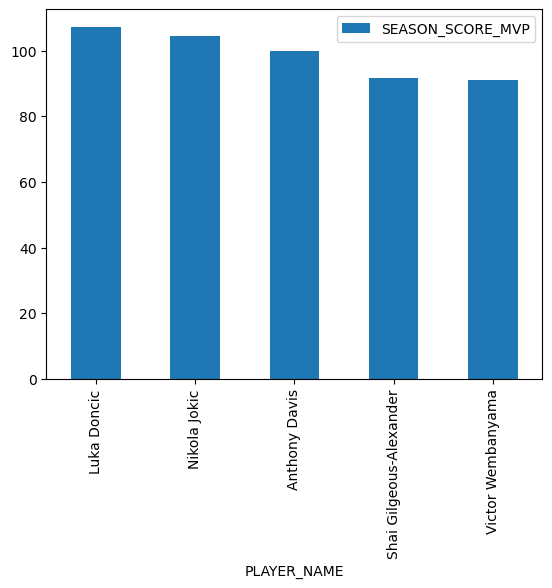

In [54]:
#Gráfico de barras mostrando os 5 principais candidatos a MVP
df_ranking.plot.bar(x ="PLAYER_NAME",y ="SEASON_SCORE_MVP")

In [55]:
#Mostra a correlação entre os recursos/caracteristicas do jogador. 
#Indica se uma variável descreve bem a outra por uma relação linear
fig = plt.figure(figsize=(20,20))
sns.heatmap(df_ranking.corr(), annot=True, cmap="Blues")
plt.title('Correlação entre recursos dos jogadores')
plt.show()

ValueError: could not convert string to float: 'Luka Doncic'

<Figure size 2000x2000 with 0 Axes>

In [ ]:
#Gráfico de dispersão para demonstrar a relação entre MVP e média de pontos
#Quanto maior a média de pontos, maior o score.
mvp.plot.scatter(x = "SEASON_AVG_PTS", y = "SEASON_SCORE_MVP")

In [ ]:
df_equipes.to_csv('Equipes 20-21.csv')
df_jogadores.to_csv('Jogadores 20-21.csv')